In [12]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import brainflow
from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds

import mne
from mne.channels import read_layout

%matplotlib inline

In [13]:
board_id = BoardIds.SYNTHETIC_BOARD.value
eeg_channels = BoardShim.get_eeg_channels(board_id)

df = pd.read_csv("../data/test.csv", sep=",")
df

,Unnamed: 0,chan 1,chan 2,chan 3,chan 4,chan 5,chan 6,chan 7,chan 8,chan 9,chan 10,chan 11,chan 12,chan 13,chan 14,chan 15,chan 16,timestamps,stim_channel1,stim_channel2
0,0,170.191544,226.381882,496.991730,45.206161,291.517303,455.423279,533.925110,454.925446,262.623779,290.552399,41.791641,158.745026,294.317810,229.905930,272.479004,457.420532,1.589746e+09,0,0
1,1,608.545654,32.207428,405.936737,492.312286,548.324097,436.894745,189.179916,428.469757,106.335022,607.697876,180.431961,451.640076,166.507507,57.513336,188.001190,378.718170,1.589746e+09,0,0
2,2,57.845947,451.876678,447.356873,124.087708,86.154175,209.242676,635.321045,571.468140,623.218872,575.467041,592.499512,54.959015,614.774414,241.093109,383.199524,510.052216,1.589746e+09,0,0
3,3,421.432098,456.397003,175.398651,180.689713,255.779144,186.808258,594.995544,621.915283,272.214783,85.757843,170.339081,619.220032,177.450424,208.448700,381.485504,450.860626,1.589746e+09,0,0
4,4,610.606812,697.292969,465.960632,470.072815,466.226593,138.360352,711.818848,525.975342,682.644836,456.375031,387.024994,142.693604,270.718872,459.266296,124.425537,214.004913,1.589746e+09,0,0
5,5,511.425873,644.100586,673.440491,586.590088,311.979706,530.916016,308.684326,208.108032,493.926025,645.720093,623.379150,237.557190,219.352463,202.295914,241.978699,397.853333,1.589746e+09,0,0
6,6,425.044067,578.989319,480.880310,717.779175,387.884521,620.564941,515.007812,489.089478,291.928925,175.218323,636.255127,285.819397,713.875549,480.924408,222.543442,654.048035,1.589746e+09,0,0
7,7,501.111298,553.664917,483.923218,356.333008,212.374725,361.712769,448.043640,561.928345,446.255219,666.853333,388.042725,281.809082,449.385010,271.219391,200.778381,730.443359,1.589746e+09,0,0
8,8,544.687317,334.837402,413.811890,310.971558,387.986816,476.007874,607.518433,451.126282,720.707947,401.373474,680.336182,242.765137,713.871948,436.354156,522.052490,692.908020,1.589746e+09,0,0
9,9,259.519775,504.352600,537.142151,389.838562,537.880066,410.470825,335.516998,695.177734,320.700623,810.320923,372.650360,671.302246,829.754211,812.259766,638.593262,621.543579,1.589746e+09,0,0


In [14]:
channels_columns = ["chan {}".format(i+1) for i in range(len(eeg_channels))]
# BrainFlow returns uV, convert to V for MNE
df[channels_columns] = df[channels_columns].apply(lambda x: x/1000000 , axis=1)

Creating RawArray with float64 data, n_channels=16, n_times=1029
    Range : 0 ... 1028 =      0.000 ...     4.112 secs
Ready.
Effective window size : 4.116 (s)


<ipython-input-15-a475e04a7873>:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = raw.plot_psd()


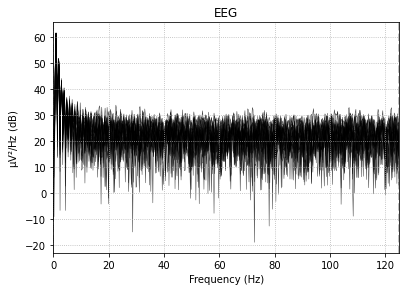

<Info | 7 non-empty values
 bads: []
 ch_names: Fz, C3, Cz, C4, Pz, PO7, Oz, PO8, F5, F7, F3, F1, F2, F4, F6, F8
 chs: 16 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 16
 projs: []
 sfreq: 250.0 Hz
>

In [15]:
ch_types = ['eeg'] * len (eeg_channels)
ch_names = BoardShim.get_eeg_names(board_id)
sfreq = BoardShim.get_sampling_rate(board_id)
info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types = ch_types)
raw = mne.io.RawArray(np.transpose(df[channels_columns].to_numpy()), info)
# its time to plot something!
fig = raw.plot_psd()
raw.info

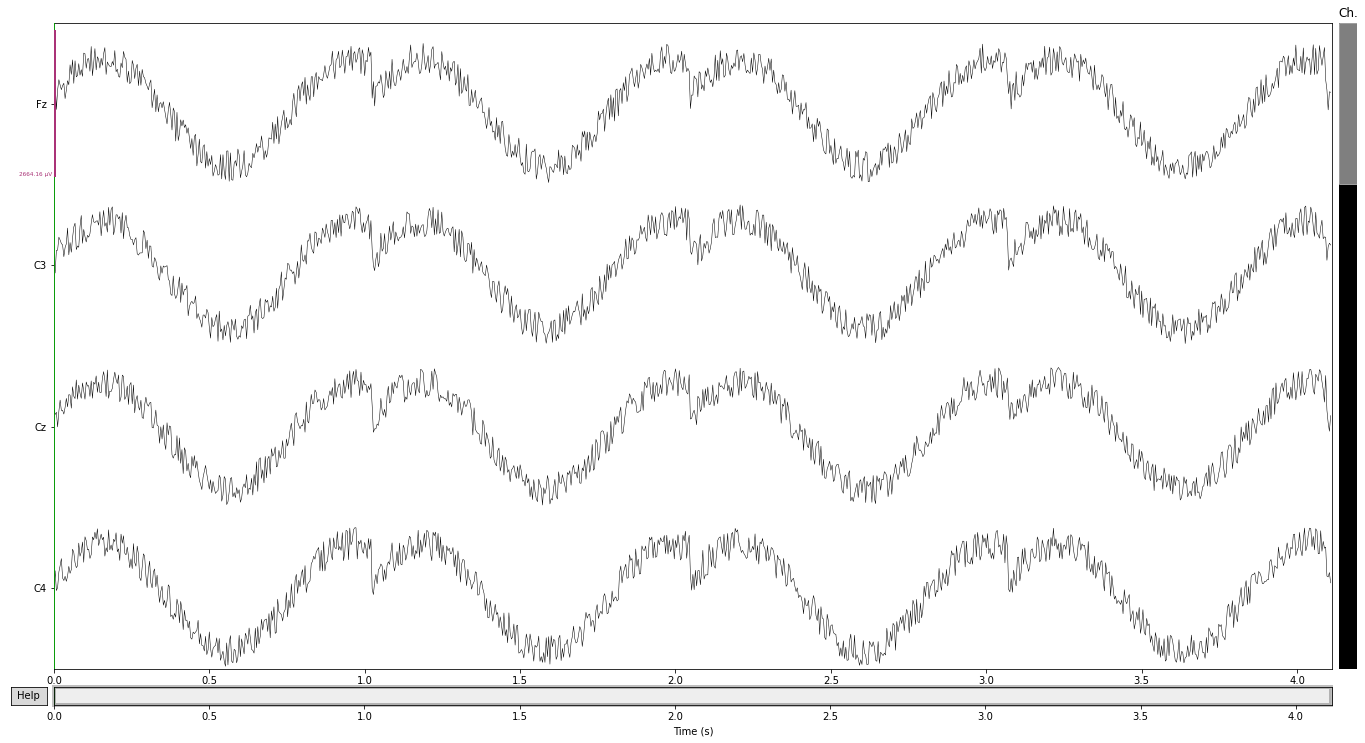

In [16]:
fig = raw.plot(n_channels=4, scalings='auto', show=True, block=True)

In [19]:
# add stim channels
info = mne.create_info(ch_names=['STI 1', 'STI 2'], sfreq=raw.info['sfreq'], ch_types=['stim', 'stim'])
stim_raw = mne.io.RawArray(np.transpose(df[['stim_channel1', 'stim_channel2']]), info)
raw.add_channels([stim_raw], force_update_info=True)

Creating RawArray with float64 data, n_channels=2, n_times=1029
    Range : 0 ... 1028 =      0.000 ...     4.112 secs
Ready.


<RawArray | 18 x 1029 (4.1 s), ~184 kB, data loaded>

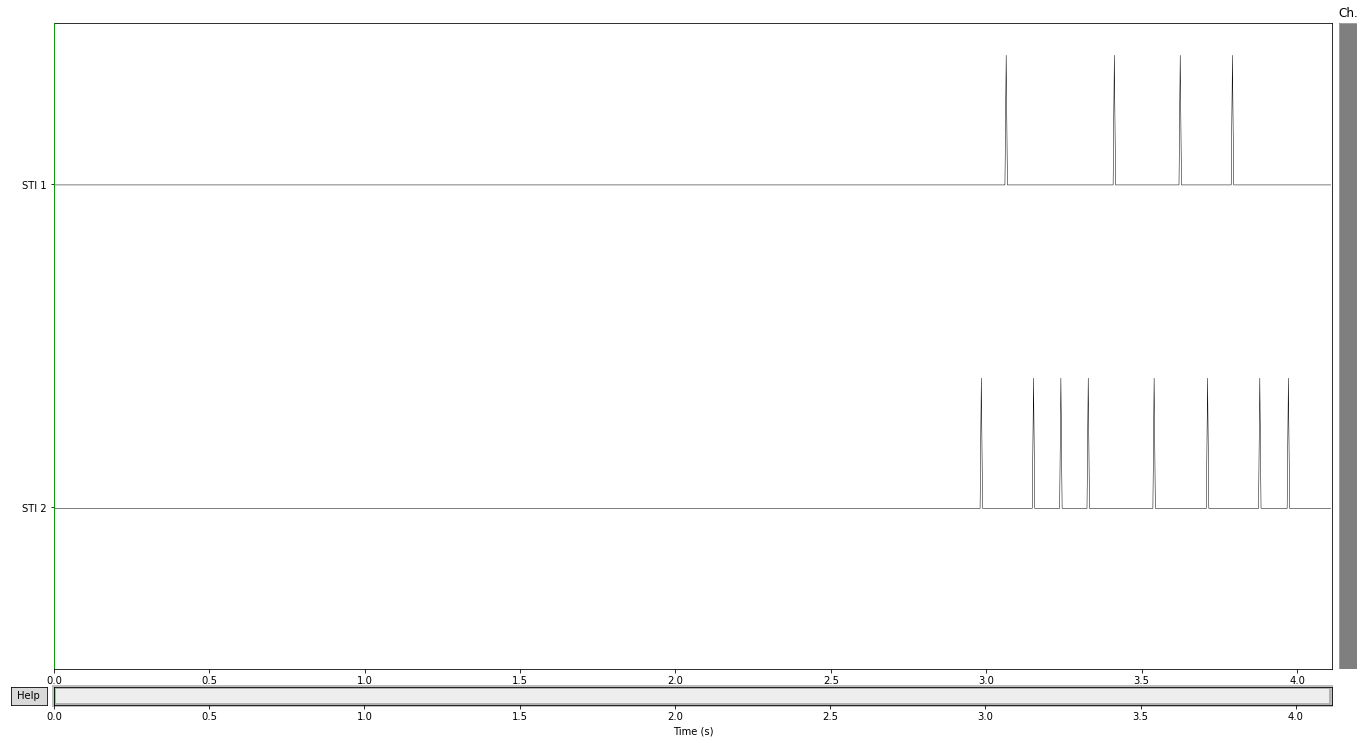

In [20]:
fig = raw.pick_types(eeg=False, stim=True).plot()

In [23]:
# get stim data
raw.copy().pick_types(eeg=False, stim=True).get_data()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])